<a href="https://colab.research.google.com/github/fahrulrozi11/Machine-Learning/blob/main/regression_automobile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Import Library

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

2.Load Dataset

In [19]:
url = "https://raw.githubusercontent.com/farrelrassya/teachingMLDL/main/01.%20Machine%20Learning/01.%20Week%201/Dataset/Automobile.csv"

# Membaca dataset
df = pd.read_csv(url)

# Menampilkan 5 baris pertama
df.head()



,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses,symboling
0,13495.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN,3
1,16500.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN,3
2,16500.0,26,19,5000.0,154.0,9.0,3.47,2.68,mpfi,152,...,94.5,front,rwd,hatchback,2.0,std,gas,alfa-romero,NaN,1
3,13950.0,30,24,5500.0,102.0,10.0,3.40,3.19,mpfi,109,...,99.8,front,fwd,sedan,4.0,std,gas,audi,164.0,2
4,17450.0,22,18,5500.0,115.0,8.0,3.40,3.19,mpfi,136,...,99.4,front,4wd,sedan,4.0,std,gas,audi,164.0,2


3. Data Cleaning

In [21]:
# Menghapus baris dengan nilai NaN
df = df.dropna()

# Mengonversi tipe data ke numerik jika perlu
df["symboling"] = df["symboling"].astype(int)
df["horsepower"] = pd.to_numeric(df["horsepower"], errors='coerce')
df["engine-size"] = pd.to_numeric(df["engine-size"], errors='coerce')
df["curb-weight"] = pd.to_numeric(df["curb-weight"], errors='coerce')

# Drop NaN lagi setelah konversi
df = df.dropna()


4.Visualisasi Data

In [22]:
X = df[["engine-size", "horsepower", "curb-weight"]]
y = df["symboling"]


A.Distribusi Target (symboling)

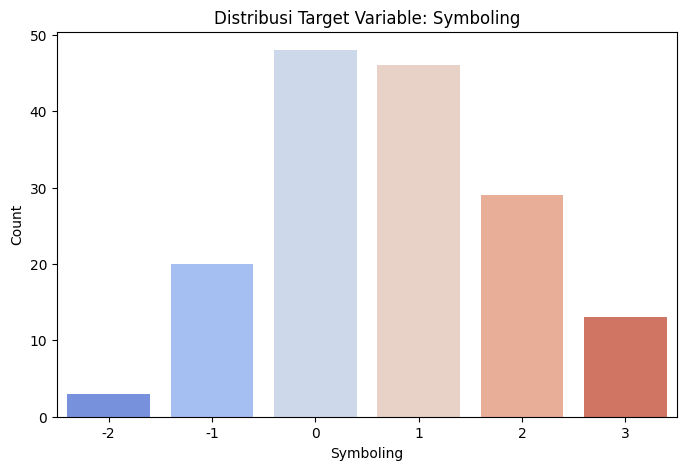

In [23]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df["symboling"], palette="coolwarm")
plt.xlabel("Symboling")
plt.ylabel("Count")
plt.title("Distribusi Target Variable: Symboling")
plt.show()


b) Korelasi Antar Fitur

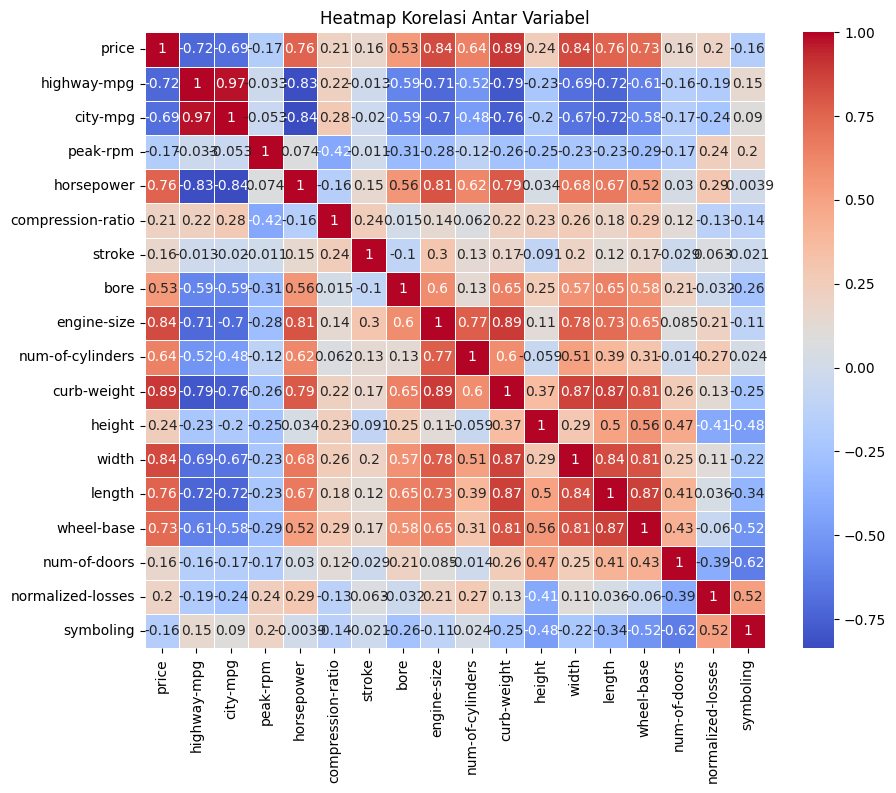

In [25]:
# Before calling df.corr(), select only numeric columns
numeric_df = df.select_dtypes(include=np.number)

# Now calculate the correlation matrix on the numeric DataFrame
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap Korelasi Antar Variabel")
plt.show()

c) Hubungan Fitur dengan Target

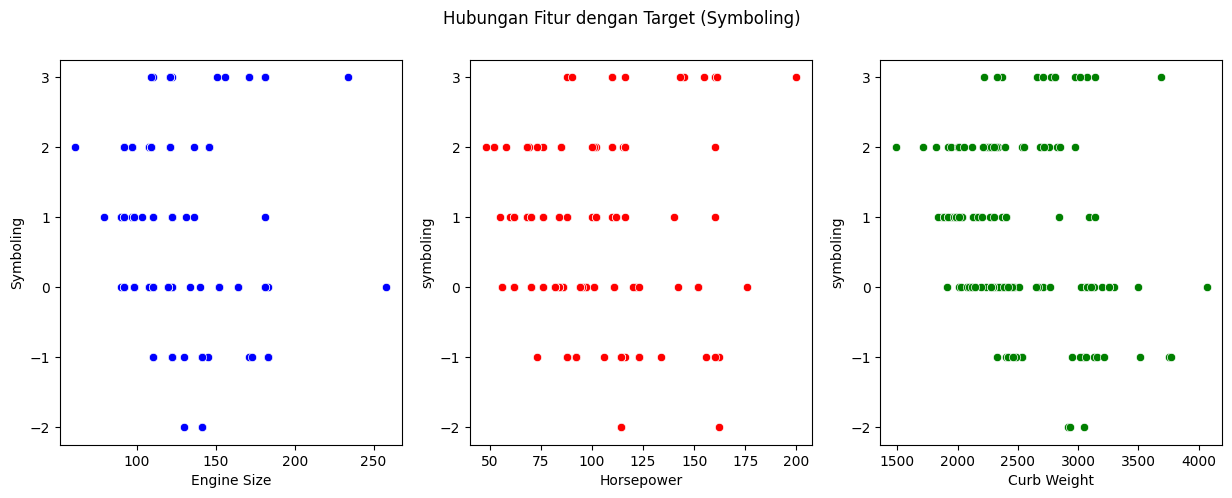

In [26]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x=df["engine-size"], y=df["symboling"], color="blue")
plt.xlabel("Engine Size")
plt.ylabel("Symboling")

plt.subplot(1, 3, 2)
sns.scatterplot(x=df["horsepower"], y=df["symboling"], color="red")
plt.xlabel("Horsepower")

plt.subplot(1, 3, 3)
sns.scatterplot(x=df["curb-weight"], y=df["symboling"], color="green")
plt.xlabel("Curb Weight")

plt.suptitle("Hubungan Fitur dengan Target (Symboling)")
plt.show()


5. Pemilihan Fitur dan Target

In [ ]:
X = df[["engine-size", "horsepower", "curb-weight"]]
y = df["symboling"]


6. Membagi Data Menjadi Training & Testing

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


7. Membuat Model Linear Regression

In [27]:
model = LinearRegression()
model.fit(X_train, y_train)

# Menampilkan koefisien dan intercept
print("Koefisien:", model.coef_)
print("Intercept:", model.intercept_)


Koefisien: [-0.00629379  0.22929659  0.21887233  0.00531222  0.00090847  0.01435743
  0.07922029 -0.00404398  0.26234625  0.19246829  0.16334816  0.42842688
  0.1121363 ]
Intercept: -1.3321806384244668


8. Prediksi Data Uji

In [28]:
y_pred = model.predict(X_test)

a) Mean Squared Error (MSE)

In [29]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)


Mean Squared Error (MSE): 0.7116749868675826


b) Root Mean Squared Error (RMSE)

In [30]:
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)


Root Mean Squared Error (RMSE): 0.8436083136548517


c) R-squared (R²)

In [31]:
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)


R-squared: 0.5719135748247213


10. Visualisasi Hasil Prediksi

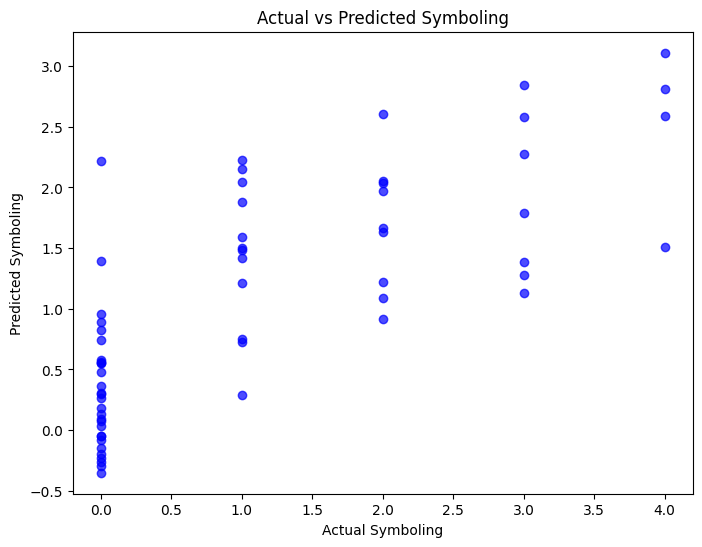

In [32]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.xlabel("Actual Symboling")
plt.ylabel("Predicted Symboling")
plt.title("Actual vs Predicted Symboling")
plt.show()


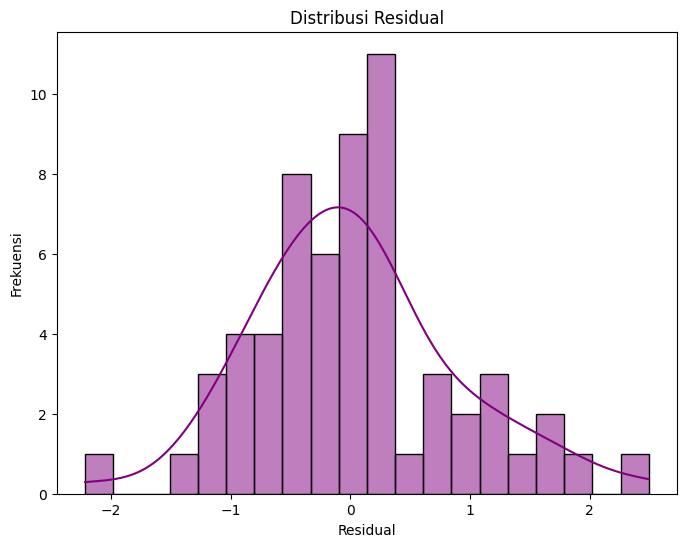

In [33]:
residuals = y_test - y_pred

plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True, color="purple", bins=20)
plt.xlabel("Residual")
plt.ylabel("Frekuensi")
plt.title("Distribusi Residual")
plt.show()


1. Persamaan Regresi Linear
Regresi linear menggunakan persamaan berikut:

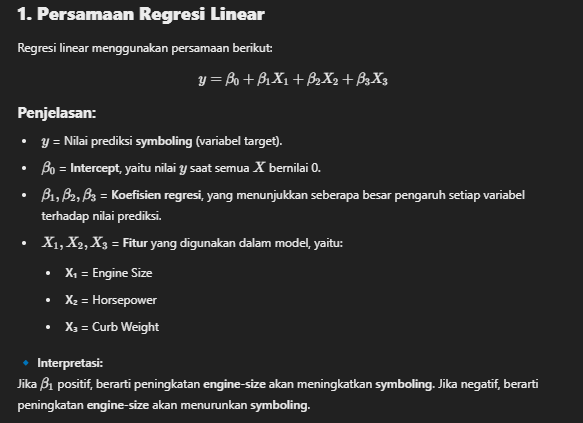

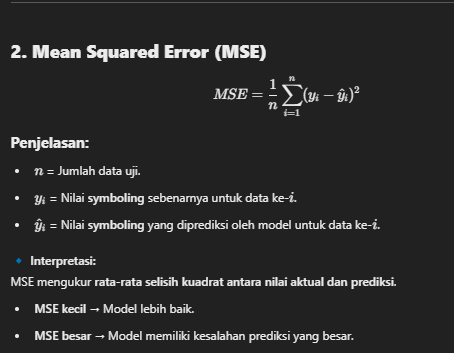

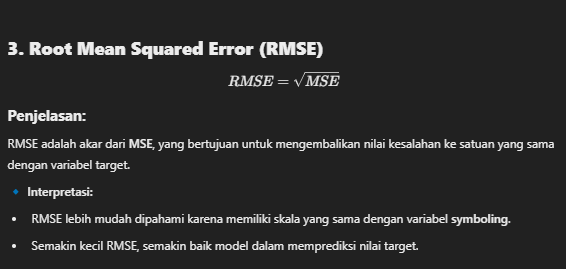

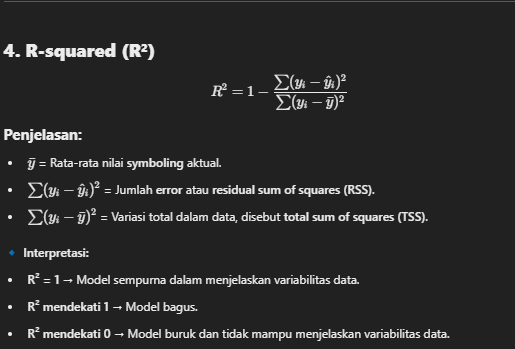